In [1]:
# import necessary modules 
import cv2 

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# import the given images
img1 = cv2.imread("./CheeseCakeFactory.png", -1) # -1 lets us load the image with its transparency (alpha channel)
img2 = cv2.imread("./Petronas.jpeg")

In [4]:
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

# check the height and width of the image
print(h1,w1) 
print(h2,w2)

print(type(img1))

600 600
332 300
<class 'numpy.ndarray'>


In [5]:
# print the dimension of the images
print(img1.shape)
print(img2.shape)

(600, 600, 4)
(332, 300, 3)


<function matplotlib.pyplot.show(*args, **kw)>

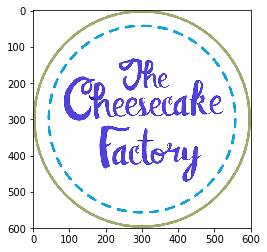

In [6]:
# visual representation of image1
plt.imshow(img1)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

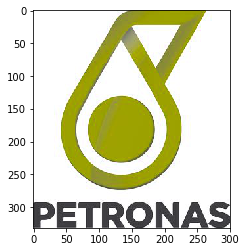

In [7]:
# visual representation of image2
plt.imshow(img2)
plt.show


In [8]:
# create a background square of the same dimension as img2
background = np.zeros((1024,1024,4))
hh,ww = background.shape[:2]

# compute xoff and yoff for placement of upper left corner of resized image   
yoff = round((hh-h1)/2)
xoff = round((ww-w1)/2)
print(yoff,xoff)

# use numpy indexing to place the resized image in the center of background image
result = background.copy()
result[yoff:yoff+h1, xoff:xoff+w1] = img1

# view result
cv2.imshow('CENTERED', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save resulting centered image
cv2.imwrite('resized_centered.png', result)

212 212


True

In [9]:
# create a background square of the same dimension as img2
background2 = np.zeros((1024,1024,3))
hh1,ww1 = background2.shape[:2]



yoff = round((hh1-h2)/2)
xoff = round((ww1-w2)/2)
print(yoff,xoff)

# use numpy indexing to place the resized image in the center of background image
result = background2.copy()
result[yoff:yoff+h2, xoff:xoff+w2] = img2

# view result
cv2.imshow('CENTERED', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save resulting centered image
cv2.imwrite('resized_centered1.png', result)

346 362


True

In [10]:
# loading the new images placed at the center of a sqaure 
new_img1 = cv2.imread("./resized_centered.png",-1)
new_img2 = cv2.imread("./resized_centered1.png")

In [12]:
# checking the dimension of new images
print(new_img1.shape)
print(new_img2.shape)

(1024, 1024, 4)
(1024, 1024, 3)


##### To stack these images, second image needs to have 4 channels. Hence, we need to add an alpha channel to second image

In [14]:
# splitting the image channels
b_channel, g_channel, r_channel = cv2.split(new_img2)

# creating an alpha channel
alpha_channel = np.ones(b_channel.shape, dtype=b_channel.dtype) * 255

# adding alpha channel to the image
img2_resize = cv2.merge((b_channel, g_channel, r_channel, alpha_channel))

In [16]:
# checking the dimensions of images after adding alpha channel
print(new_img1.shape)
print(img2_resize.shape)

(1024, 1024, 4)
(1024, 1024, 4)


#### Awesome, now both the images have same number of channels. Now they can be stacked

In [17]:
# stacking images horizontally
result_image = np.concatenate((new_img1,img2_resize), axis=1)


In [18]:
# view result
cv2.imshow('result image', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save the resultant image as a PNG image
cv2.imwrite('result_image.png', result_image)

True

(1024, 2048, 4)


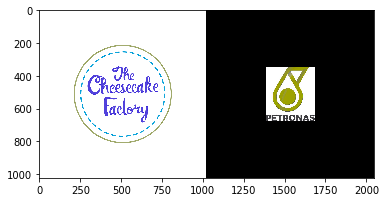

In [20]:
result__image = cv2.imread("./result_image.png", cv2.IMREAD_UNCHANGED)

plt.imshow(result__image)
plt.show

print(result_image.shape)